### Supervised Learning

In [3]:
import pandas as pd
df = pd.read_csv('penguins_size.csv')


species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen              39.1             18.7              181.0   
1    Adelie  Torgersen              39.5             17.4              186.0   
2    Adelie  Torgersen              40.3             18.0              195.0   
3    Adelie  Torgersen               NaN              NaN                NaN   
4    Adelie  Torgersen              36.7             19.3              193.0   
..      ...        ...               ...              ...                ...   
339  Gentoo     Biscoe               NaN              NaN                NaN   
340  Gentoo     Biscoe              46.8             14.3              215.0   
341  Gentoo     Biscoe              50.4             15.7              222.0   
342  Gentoo     Biscoe              45.2             14.8              212.0   
343  Gentoo     Biscoe              49.9             16.1              213.0   

     body_mass_g     sex  
0         3750.0    MALE  
1         3800.0  FEMALE  
2         3250.0  FEMALE  
3            NaN     NaN  
4         3450.0  FEMALE  
..           ...     ...  
339          NaN     NaN  
340       4850.0  FEMALE  
341       5750.0    MALE  
342       5200.0  FEMALE  
343       5400.0    MALE  

[344 rows x 7 columns]

In [4]:
df.species.unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

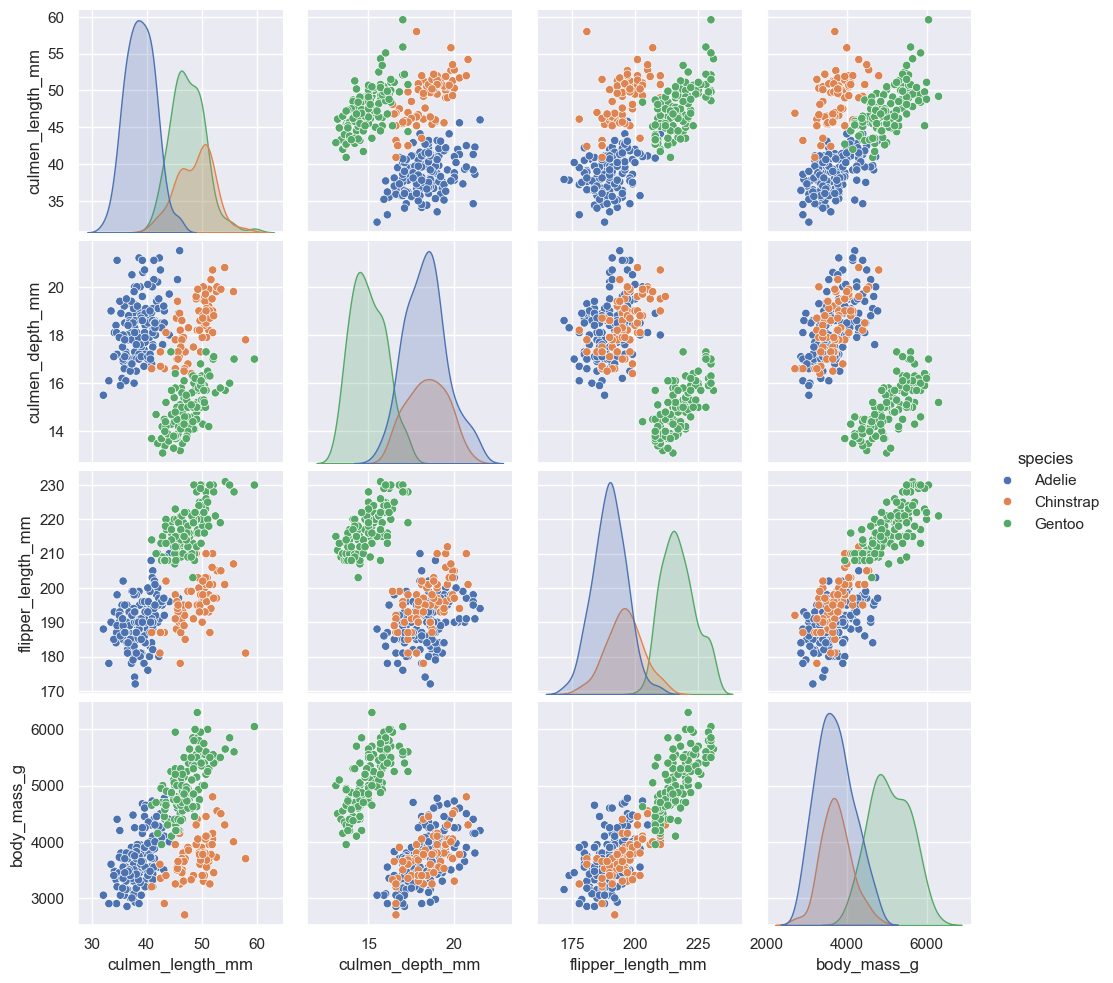

In [5]:
import seaborn as sns; sns.set()
sns.pairplot(df, hue='species', height=2.5);

In [6]:
penguins = df.drop(columns=['island','sex']).dropna()

species  culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
0    Adelie              39.1             18.7              181.0       3750.0
1    Adelie              39.5             17.4              186.0       3800.0
2    Adelie              40.3             18.0              195.0       3250.0
4    Adelie              36.7             19.3              193.0       3450.0
5    Adelie              39.3             20.6              190.0       3650.0
..      ...               ...              ...                ...          ...
338  Gentoo              47.2             13.7              214.0       4925.0
340  Gentoo              46.8             14.3              215.0       4850.0
341  Gentoo              50.4             15.7              222.0       5750.0
342  Gentoo              45.2             14.8              212.0       5200.0
343  Gentoo              49.9             16.1              213.0       5400.0

[342 rows x 5 columns]

In [7]:
penguins_X = penguins.drop(columns=['species'])

culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
0                39.1             18.7              181.0       3750.0
1                39.5             17.4              186.0       3800.0
2                40.3             18.0              195.0       3250.0
4                36.7             19.3              193.0       3450.0
5                39.3             20.6              190.0       3650.0
..                ...              ...                ...          ...
338              47.2             13.7              214.0       4925.0
340              46.8             14.3              215.0       4850.0
341              50.4             15.7              222.0       5750.0
342              45.2             14.8              212.0       5200.0
343              49.9             16.1              213.0       5400.0

[342 rows x 4 columns]

In [8]:
penguins_Y = penguins['species']

0      Adelie
1      Adelie
2      Adelie
4      Adelie
5      Adelie
        ...  
338    Gentoo
340    Gentoo
341    Gentoo
342    Gentoo
343    Gentoo
Name: species, Length: 342, dtype: object

In [12]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(penguins_X, penguins_Y,
                                                random_state=42)

In [10]:
?train_test_split

Signature:
train_test_split(
    *arrays,
    test_size=None,
    train_size=None,
    random_state=None,
    shuffle=True,
    stratify=None,
)
Docstring:
Split arrays or matrices into random train and test subsets.

Quick utility that wraps input validation,
``next(ShuffleSplit().split(X, y))``, and application to input data
into a single call for splitting (and optionally subsampling) data into a
one-liner.

Read more in the :ref:`User Guide <cross_validation>`.

Parameters
----------
*arrays : sequence of indexables with same length / shape[0]
    Allowed inputs are lists, numpy arrays, scipy-sparse
    matrices or pandas dataframes.

test_size : float or int, default=None
    If float, should be between 0.0 and 1.0 and represent the proportion
    of the dataset to include in the test split. If int, represents the
    absolute number of test samples. If None, the value is set to the
    complement of the train size. If ``train_size`` is also None, it will
    be set to 0.25.

trai

In [13]:
Xtrain

culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
25               35.3             18.9              187.0       3800.0
324              47.3             13.8              216.0       4725.0
144              37.3             16.8              192.0       3000.0
209              49.3             19.9              203.0       4050.0
254              49.1             14.8              220.0       5150.0
..                ...              ...                ...          ...
189              52.0             20.7              210.0       4800.0
72               39.6             17.2              196.0       3550.0
107              38.2             20.0              190.0       3900.0
271              48.5             14.1              220.0       5300.0
103              37.8             20.0              190.0       4250.0

[256 rows x 4 columns]

In [14]:
from sklearn.neighbors import KNeighborsClassifier # 1. choose model class
model = KNeighborsClassifier(n_neighbors=3)        # 2. instantiate model
model.fit(Xtrain, ytrain)                          # 3. fit model to data
y_model = model.predict(Xtest)                     # 4. predict on new data

array(['Gentoo', 'Chinstrap', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Gentoo',
       'Gentoo', 'Gentoo', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Adelie',
       'Adelie', 'Adelie', 'Gentoo', 'Chinstrap', 'Chinstrap', 'Gentoo',
       'Chinstrap', 'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Adelie',
       'Chinstrap', 'Gentoo', 'Gentoo', 'Adelie', 'Adelie', 'Adelie',
       'Gentoo', 'Gentoo', 'Adelie', 'Adelie', 'Gentoo', 'Gentoo',
       'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Gentoo', 'Gentoo',
       'Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Gentoo', 'Adelie',
       'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Adelie', 'Chinstrap',
       'Adelie', 'Adelie', 'Chinstrap', 'Adelie', 'Adelie', 'Adelie',
       'Gentoo', 'Gentoo', 'Gentoo', 'Adelie', 'Gentoo', 'Chinstrap',
       'Gentoo', 'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Gentoo',
       'Adelie', 'Adelie'], dtype=obje

In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.8023255813953488

In [16]:
from sklearn.naive_bayes import GaussianNB # 1. choose model class
model = GaussianNB()                       # 2. instantiate model
model.fit(Xtrain, ytrain)                  # 3. fit model to data
y_model = model.predict(Xtest)             # 4. predict on new data

array(['Gentoo', 'Adelie', 'Adelie', 'Chinstrap', 'Adelie', 'Gentoo',
       'Chinstrap', 'Chinstrap', 'Gentoo', 'Adelie', 'Adelie', 'Gentoo',
       'Gentoo', 'Gentoo', 'Adelie', 'Chinstrap', 'Adelie', 'Adelie',
       'Chinstrap', 'Adelie', 'Chinstrap', 'Adelie', 'Gentoo', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Chinstrap', 'Adelie', 'Gentoo',
       'Chinstrap', 'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Adelie',
       'Chinstrap', 'Gentoo', 'Chinstrap', 'Adelie', 'Adelie', 'Adelie',
       'Gentoo', 'Gentoo', 'Adelie', 'Chinstrap', 'Gentoo', 'Gentoo',
       'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Gentoo', 'Adelie',
       'Adelie', 'Chinstrap', 'Adelie', 'Gentoo', 'Gentoo', 'Adelie',
       'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Adelie', 'Chinstrap',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Gentoo', 'Gentoo', 'Gentoo', 'Adelie', 'Gentoo', 'Chinstrap',
       'Gentoo', 'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Gentoo',
       'Adelie', 'Ad

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9418604651162791

In [18]:
?GaussianNB

Init signature: GaussianNB(*, priors=None, var_smoothing=1e-09)
Docstring:     
Gaussian Naive Bayes (GaussianNB).

Can perform online updates to model parameters via :meth:`partial_fit`.
For details on algorithm used to update feature means and variance online,
see Stanford CS tech report STAN-CS-79-773 by Chan, Golub, and LeVeque:

    http://i.stanford.edu/pub/cstr/reports/cs/tr/79/773/CS-TR-79-773.pdf

Read more in the :ref:`User Guide <gaussian_naive_bayes>`.

Parameters
----------
priors : array-like of shape (n_classes,), default=None
    Prior probabilities of the classes. If specified, the priors are not
    adjusted according to the data.

var_smoothing : float, default=1e-9
    Portion of the largest variance of all features that is added to
    variances for calculation stability.

    .. versionadded:: 0.20

Attributes
----------
class_count_ : ndarray of shape (n_classes,)
    number of training samples observed in each class.

class_prior_ : ndarray of shape (n_classes,)

In [19]:
model.n_features_in_

4

### Clustering

/var/folders/9w/_230jf8901jg8qdm81czt46c0000gn/T/ipykernel_72181/668789359.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = ListedColormap(get_cmap("tab10").colors[:3])


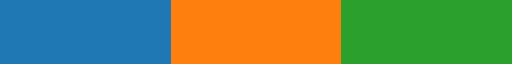

In [20]:
from matplotlib.colors import ListedColormap
from matplotlib.cm import get_cmap

cmap = ListedColormap(get_cmap("tab10").colors[:3])

In [21]:
from sklearn.cluster import KMeans
kmeans = KMeans(3, random_state=0)
labels = kmeans.fit(penguins_X).predict(penguins_X)

array([2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0, 2, 0, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0,
       2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 0, 2,
       0, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2,
       2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 2, 2, 0, 2,
       0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,

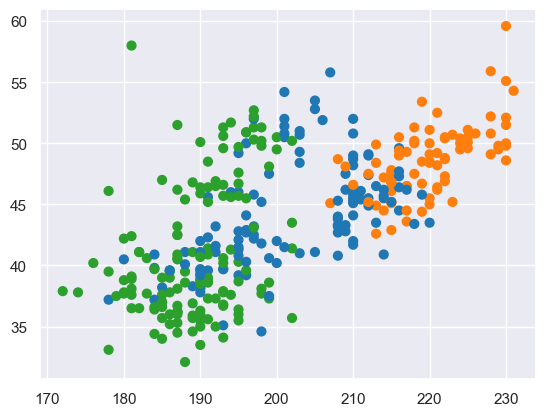

In [22]:
from matplotlib import pyplot as plt
plt.scatter(penguins_X['flipper_length_mm'], penguins_X['culmen_length_mm'], c=labels, s=40, cmap=cmap,vmin=0, vmax=2);

In [23]:
species_map = {'Adelie': 1, 'Chinstrap': 2, 'Gentoo': 0}

{'Adelie': 1, 'Chinstrap': 2, 'Gentoo': 0}

/var/folders/9w/_230jf8901jg8qdm81czt46c0000gn/T/ipykernel_72181/1191939742.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap2 = ListedColormap([get_cmap("tab10").colors[1], get_cmap("tab10").colors[0], get_cmap("tab10").colors[2]])


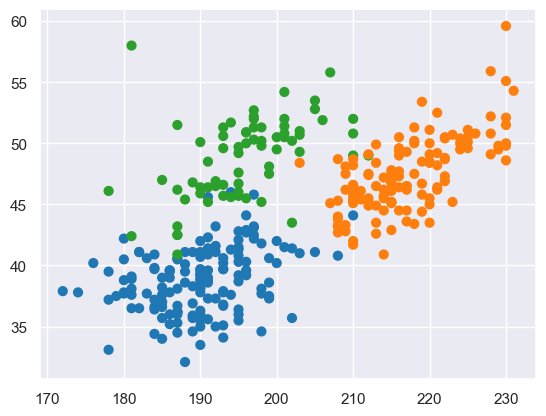

In [24]:
cmap2 = ListedColormap([get_cmap("tab10").colors[1], get_cmap("tab10").colors[0], get_cmap("tab10").colors[2]])
penguins_Y_map = penguins_Y.unique()
plt.scatter(penguins_X['flipper_length_mm'], penguins_X['culmen_length_mm'], c=penguins_Y.map(species_map), s=40, cmap=cmap2);

In [25]:
from sklearn.mixture import GaussianMixture     # 1. Choose the model class
model = GaussianMixture(n_components=3,
                        covariance_type='full') # 2. Instantiate the model with hyperparameters
model.fit(penguins_X)                           # 3. Fit to data. Notice y is not specified!
output_Y = model.predict(penguins_X)            # 4. Determine cluster labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

/var/folders/9w/_230jf8901jg8qdm81czt46c0000gn/T/ipykernel_72181/3031664678.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap2 = ListedColormap([get_cmap("tab10").colors[2], get_cmap("tab10").colors[1], get_cmap("tab10").colors[0]])


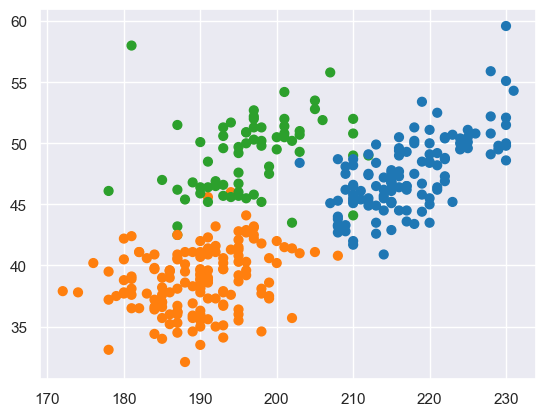

In [26]:
cmap2 = ListedColormap([get_cmap("tab10").colors[2], get_cmap("tab10").colors[1], get_cmap("tab10").colors[0]])
penguins_Y_map = penguins_Y.unique()
plt.scatter(penguins_X['flipper_length_mm'], penguins_X['culmen_length_mm'], c=output_Y, s=40, cmap=cmap2);